In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [2]:
dataset = pd.read_csv(r'C:\Users\ilgin\Desktop\IMDB Dataset.csv')
print(dataset)   #dataseti yazdırma

                                                  review sentiment
0      One of the other reviewers has mentioned that ...  positive
1      A wonderful little production. <br /><br />The...  positive
2      I thought this was a wonderful way to spend ti...  positive
3      Basically there's a family where a little boy ...  negative
4      Petter Mattei's "Love in the Time of Money" is...  positive
...                                                  ...       ...
49995  I thought this movie did a down right good job...  positive
49996  Bad plot, bad dialogue, bad acting, idiotic di...  negative
49997  I am a Catholic taught in parochial elementary...  negative
49998  I'm going to have to disagree with the previou...  negative
49999  No one expects the Star Trek movies to be high...  negative

[50000 rows x 2 columns]


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [4]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()            
dataset["sentiment"] = le.fit_transform(dataset["sentiment"])
print(dataset)

                                                  review  sentiment
0      One of the other reviewers has mentioned that ...          1
1      A wonderful little production. <br /><br />The...          1
2      I thought this was a wonderful way to spend ti...          1
3      Basically there's a family where a little boy ...          0
4      Petter Mattei's "Love in the Time of Money" is...          1
...                                                  ...        ...
49995  I thought this movie did a down right good job...          1
49996  Bad plot, bad dialogue, bad acting, idiotic di...          0
49997  I am a Catholic taught in parochial elementary...          0
49998  I'm going to have to disagree with the previou...          0
49999  No one expects the Star Trek movies to be high...          0

[50000 rows x 2 columns]


In [5]:
train_data, test_data = train_test_split(dataset, test_size = 0.2, random_state=42) 

In [6]:
tokenizer = Tokenizer(num_words = 5000)
tokenizer.fit_on_texts(train_data["review"])

In [7]:
X_train = pad_sequences(tokenizer.texts_to_sequences(train_data["review"]), maxlen=200)
X_test = pad_sequences(tokenizer.texts_to_sequences(test_data["review"]), maxlen=200)

In [8]:
Y_train = train_data["sentiment"]
Y_test = test_data["sentiment"]

In [9]:
model = Sequential()
model.add(Embedding(input_dim =5000, output_dim = 128, input_length = 200))
model.add(LSTM(128, dropout=0.2, recurrent_dropout = 0.2))
model.add(Dense(1, activation = "sigmoid"))

c:\Users\ilgin\anaconda3\envs\btk_akademi\lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [10]:
model.compile(optimizer = "adam", loss="binary_crossentropy", metrics=["accuracy"])

In [11]:
history=model.fit(X_train, Y_train, epochs = 5, batch_size = 64, validation_split = 0.2)

Epoch 1/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 56s 109ms/step - accuracy: 0.7202 - loss: 0.5370 - val_accuracy: 0.8211 - val_loss: 0.4110
Epoch 2/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 57s 113ms/step - accuracy: 0.8430 - loss: 0.3707 - val_accuracy: 0.8207 - val_loss: 0.4005
Epoch 3/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 52s 104ms/step - accuracy: 0.8651 - loss: 0.3237 - val_accuracy: 0.8529 - val_loss: 0.3543
Epoch 4/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 53s 105ms/step - accuracy: 0.8712 - loss: 0.3091 - val_accuracy: 0.8736 - val_loss: 0.3222
Epoch 5/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 55s 110ms/step - accuracy: 0.8976 - loss: 0.2612 - val_accuracy: 0.8566 - val_loss: 0.3381


In [12]:
from sklearn.metrics import classification_report, confusion_matrix

# Tahminleri al
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Classification Report ve Confusion Matrix
print("Classification Report:\n", classification_report(Y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(Y_test, y_pred))


313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.92      0.87      4961
           1       0.91      0.80      0.85      5039

    accuracy                           0.86     10000
   macro avg       0.87      0.86      0.86     10000
weighted avg       0.87      0.86      0.86     10000

Confusion Matrix:
 [[4554  407]
 [ 983 4056]]


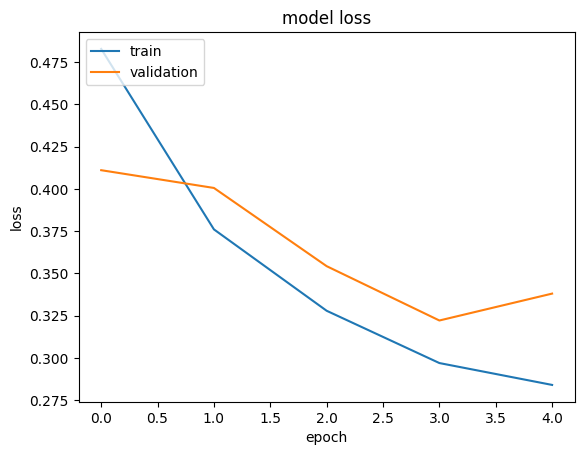

In [13]:
from matplotlib import pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

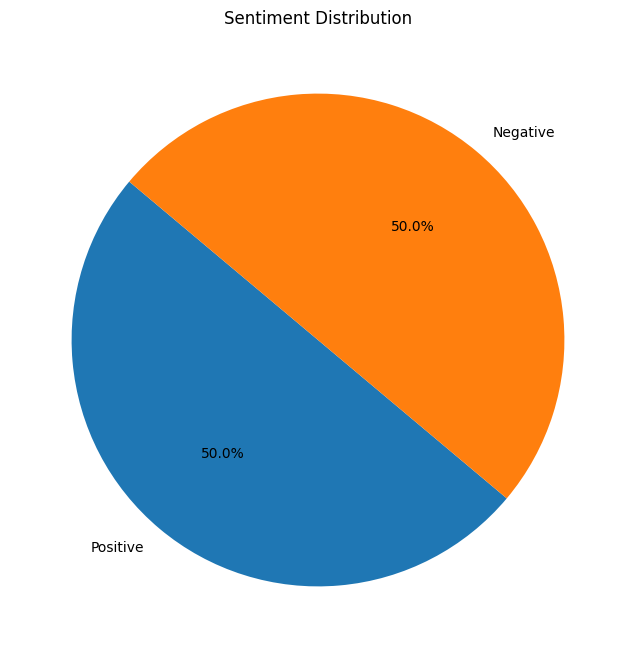

In [14]:
import seaborn as sns
sentiment_counts = dataset["sentiment"].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(sentiment_counts, labels=["Positive", "Negative"], autopct='%1.1f%%', startangle=140)
plt.title("Sentiment Distribution")
plt.show()


In [15]:
def predictive_system(review):
  sequences = tokenizer.texts_to_sequences([review])
  padded_sequence = pad_sequences(sequences, maxlen=200)
  prediction = model.predict(padded_sequence)
  sentiment = "positive" if prediction[0][0] > 0.5 else "negative"
  return sentiment

In [19]:
predictive_system("It was fantastic")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


'positive'

In [19]:
predictive_system("The movie was way to long")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


'negative'